In [58]:
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv


load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")


llm = ChatOpenAI(openai_api_key=api_key, max_tokens=100, temperature=1)

In [59]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a CPTSD Therapist with 20 plus years experience in healing people from CPTSD."),
    ("user", "{input}"),
    
])

chain = prompt | llm


In [60]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()
chain = chain | output_parser


In [61]:
import pdfplumber

def get_and_update_current_page(file_path, increment=2):
    try:
        with open(file_path, 'r') as file:
            current_page = int(file.read().strip())
    except FileNotFoundError:
        current_page = 0 

    new_current_page = current_page + increment

    with open(file_path, 'w') as file:
        file.write(str(new_current_page))

    return current_page, new_current_page

# Function to extract text from a specific section of the PDF
def extract_section_from_pdf(pdf_path, start_page, end_page):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        pages = pdf.pages[start_page:end_page]
        for page in pages:
            text += page.extract_text() + "\n"
    return text

# File to store current page number
current_page_file = 'current_page.txt'

start_page, next_start_page = get_and_update_current_page(current_page_file)


# Extract text from today's section
pdf_text = extract_section_from_pdf("CPTSD.pdf", start_page, next_start_page)

response = chain.invoke({"input": "write a 20 words supportive quote for a person suffering from cptsd that would heal them, from the following text" + pdf_text})

print(response)

quote=response

"You have the power to heal and protect your inner child. Understanding your trauma is the key to your recovery."


In [63]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_openai import OpenAI

quote= response
print(quote)
llm = OpenAI(temperature=0.9)


prompt_template = PromptTemplate(
    input_variables=["quote"], 
    template="harmonious, full fo nature, therapeutic, no human: {quote}",
)

chain = LLMChain(llm=llm, prompt=prompt_template)


input_data = {"quote": quote}

prompt = chain.run(input_data)
print(prompt)

len(prompt)
max_length = 1000
if len(prompt) >= max_length:
    prompt = prompt[:max_length]

print(len(prompt))

image_url = DallEAPIWrapper().run(prompt)

print(image_url)


"You have the power to heal and protect your inner child. Understanding your trauma is the key to your recovery."


The sound of the gentle breeze rustling through the leaves fills the air, accompanied by the soothing chirping of birds. The sun's warm rays pierce through the thick canopy of trees, dappling the forest floor with speckles of light. The earthy scent of moss and damp soil tickles your nose as you take in the peaceful surroundings.

As you explore deeper into the forest, you stumble upon a small, hidden pond. Its crystal clear waters reflect the vibrant greens of the surrounding foliage, creating a serene and tranquil atmosphere. A chorus of frogs croak in the distance, welcoming you to their home.

You take a seat by the pond, and as you dip your feet into the cool water, you feel a sense of calm wash over you. The gentle ripples created by your toes seem to whisper words of comfort and understanding. The forest seems to be speaking to you, whispering secrets of healing an

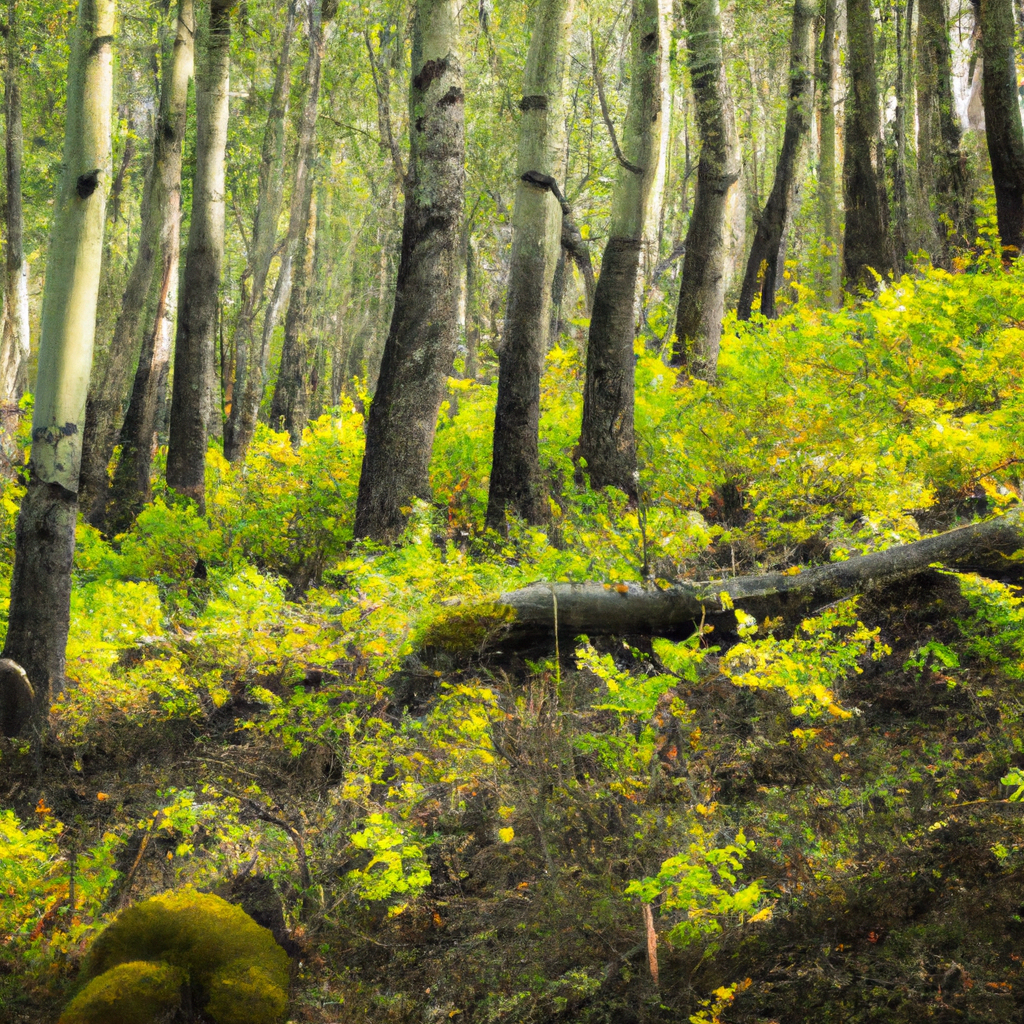

In [77]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import datetime


response = requests.get(image_url)
image_data = BytesIO(response.content)
image = Image.open(image_data)

display(image)

current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S%f")
filename = f"image_{current_time}.jpg"  

image.save("images/"+ filename)



In [65]:
print(prompt)



The sound of the gentle breeze rustling through the leaves fills the air, accompanied by the soothing chirping of birds. The sun's warm rays pierce through the thick canopy of trees, dappling the forest floor with speckles of light. The earthy scent of moss and damp soil tickles your nose as you take in the peaceful surroundings.

As you explore deeper into the forest, you stumble upon a small, hidden pond. Its crystal clear waters reflect the vibrant greens of the surrounding foliage, creating a serene and tranquil atmosphere. A chorus of frogs croak in the distance, welcoming you to their home.

You take a seat by the pond, and as you dip your feet into the cool water, you feel a sense of calm wash over you. The gentle ripples created by your toes seem to whisper words of comfort and understanding. The forest seems to be speaking to you, whispering secrets of healing and protection.

In this sacred space, you can feel the power of nature working its magic. The trees, the animals, a

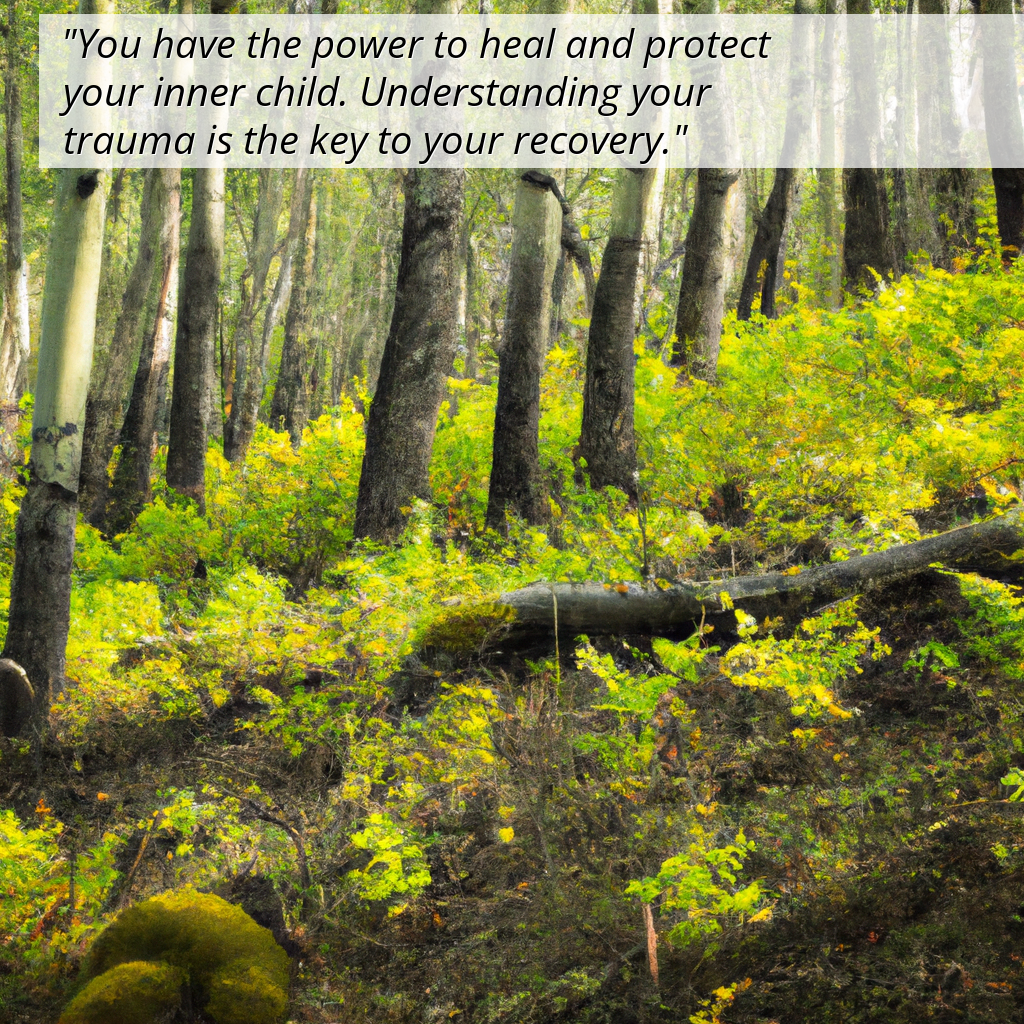

In [78]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import textwrap


def draw_multiline_text_with_frosted_background(image, text, position, font, text_color, shadow_color, shadow_offset, line_spacing=1.2):
    draw = ImageDraw.Draw(image)
    lines = textwrap.wrap(text, width=40)

    x, y = position
    shadow_x, shadow_y = shadow_offset

    # Estimate the size of the frosted background
    # Assuming average character width is roughly half the font size (a rough estimation)
    average_char_width = font.size // 1
    max_text_width = max(len(line) for line in lines) * average_char_width
    line_height = int(font.size * line_spacing)
    total_text_height = len(lines) * line_height

    frosted_background_size = (max_text_width + 20, total_text_height + 10)  # Extra padding
    frosted_background_position = (x - 1, y - 1)

    # Create frosted background (semi-transparent rectangle)
    frosted_background = Image.new("RGBA", frosted_background_size, (255, 255, 255, 180))
    image.paste(frosted_background, frosted_background_position, frosted_background)

    for line in lines:
       # Calculate x-coordinate to center the text within the frosted background
        text_bbox = draw.textbbox((0, 0), line, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        x_centered = x + (max_text_width - text_width) / 40

  
        draw.text((x_centered + shadow_x, y + shadow_y), line, font=font, fill=shadow_color)
        
        draw.text((x_centered, y), line, font=font, fill=text_color)
        y += line_height  # Increment y position by line height

# Load the font
font_path = 'fonts/OpenSans-Bold.ttf'
my_font = ImageFont.truetype(font_path, 40)

# Shadow settings
shadow_color = "white"
shadow_offset = (1, 1)


# Use the function with frosted background
draw_multiline_text_with_frosted_background(image, quote, (40, 15), my_font, 'black', shadow_color, shadow_offset)

# Generate a unique filename with the current date and time
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"image_{current_time}.jpg"  # The file will be saved with a .jpg extension

# Save the image in the current directory with the generated filename
image.save("images/"+ filename)

display(image)

In [68]:
import requests

# Replace 'WEBHOOK_URL' with your actual webhook URL
webhook_url = 'https://hook.eu2.make.com/s1ulpw08lbfyyrywspore9wsqxlqlw5f'
 

# Define the dynamic variable

# Convert the dynamic variable to an image file
# Replace 'image_format' with the desired image format (e.g., 'png')
# image_data = f"{dynamic_variable}.{image_format}"
print(filename)
image_data = "images/" + filename

# Open the image file in binary mode
with open(image_data, 'rb') as f:
    # Create a dictionary with a key 'file' and the file object as the value
    files = {'file': f}
    try:
        # Make a POST request to the webhook URL, passing the files
        response = requests.post(webhook_url, files=files)
        # Check if the request was successful
        if response.status_code == 200:
            print("Image sent successfully")
        else:
            print("Error sending image:", response.status_code)
    except requests.exceptions.RequestException as e:
        print("Error sending image:", e)

image_20240203_131652.jpg
Image sent successfully
